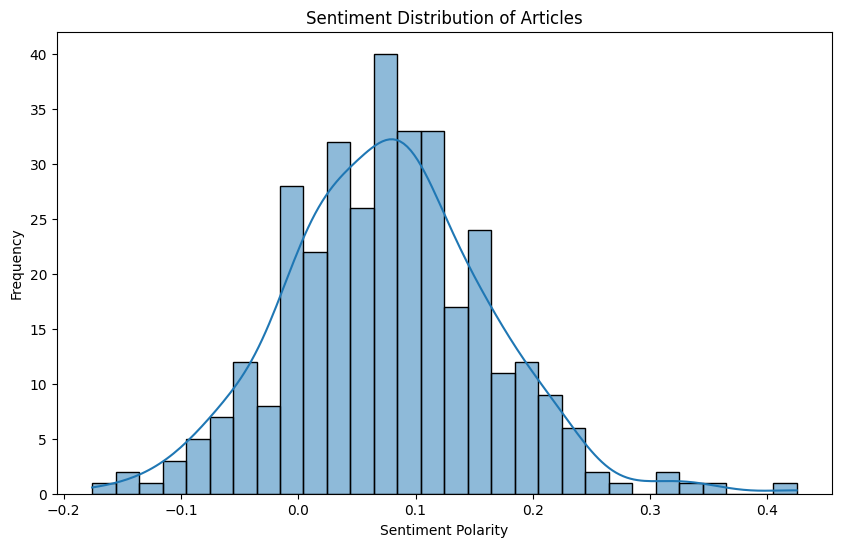

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles.csv'
articles_df = pd.read_csv(file_path)

# Perform sentiment analysis using TextBlob
articles_df['sentiment'] = articles_df['clean_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save the dataframe with sentiment analysis
output_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles_with_sentiment.csv'
articles_df.to_csv(output_path, index=False)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(articles_df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


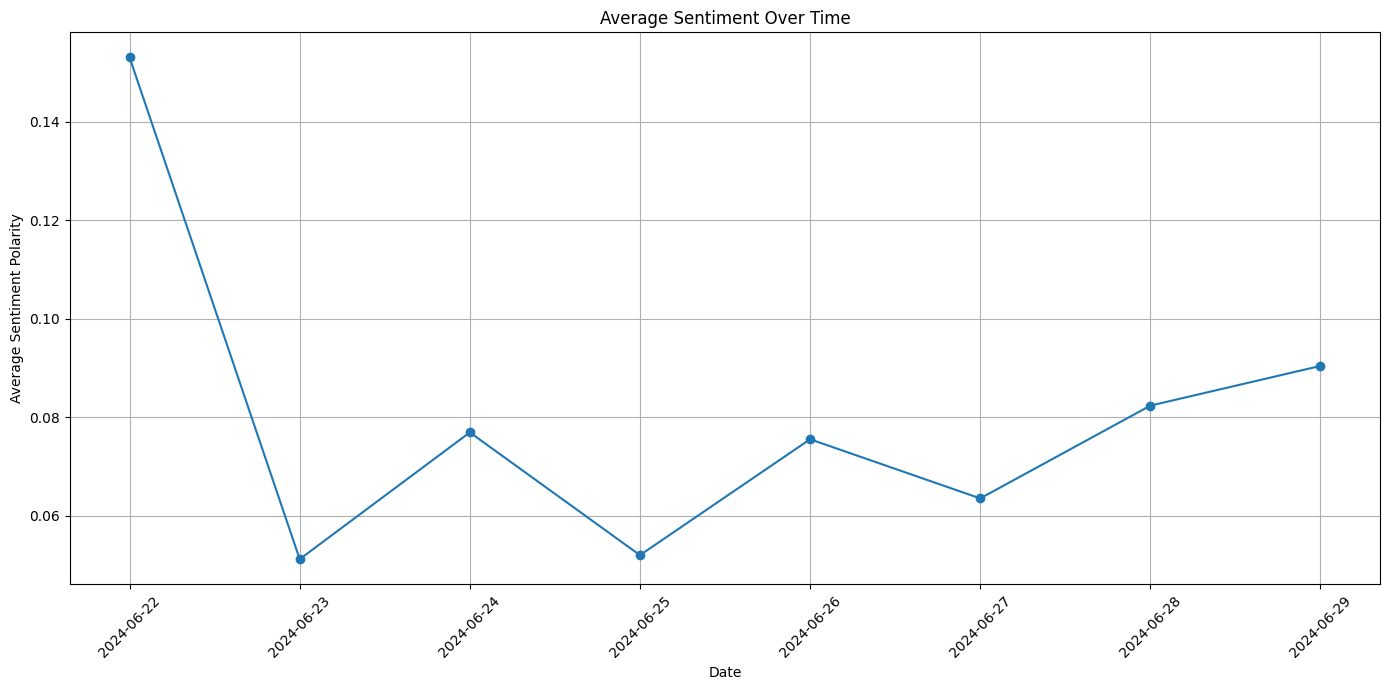

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles.csv'
articles_df = pd.read_csv(file_path)

# Ensure the date column is in datetime format
articles_df['date'] = pd.to_datetime(articles_df['date'])

# Perform sentiment analysis using TextBlob
articles_df['sentiment'] = articles_df['clean_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate sentiment scores by date
sentiment_over_time = articles_df.groupby('date')['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_over_time['date'], sentiment_over_time['sentiment'], marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load JSON file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/article_cache.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data to a DataFrame
articles = []
for url, details in data.items():
    details['url'] = url
    articles.append(details)

articles_df = pd.DataFrame(articles)

# Ensure the date column is in datetime format
articles_df['date'] = pd.to_datetime(articles_df['date'])

# Check the structure of the keywords column
print("Sample keywords data:")
print(articles_df['keywords'].head())

# Filter articles by keywords
keyword = 'Biden'  # Change this to your desired keyword
filtered_articles_df = articles_df[articles_df['keywords'].apply(lambda x: keyword in x)]

# Check the number of articles after filtering
print(f"Number of articles containing the keyword '{keyword}': {len(filtered_articles_df)}")

# If no articles are found, print a message and stop
if len(filtered_articles_df) == 0:
    print(f"No articles found containing the keyword '{keyword}'.")
else:
    # Perform sentiment analysis using TextBlob
    filtered_articles_df['sentiment'] = filtered_articles_df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Display the filtered articles dataframe
    print("Filtered articles data:")
    print(filtered_articles_df[['date', 'title', 'sentiment']].head())

    # Aggregate sentiment scores by date
    sentiment_over_time = filtered_articles_df.groupby('date')['sentiment'].mean().reset_index()

    # Plot sentiment over time
    plt.figure(figsize=(14, 7))
    plt.plot(sentiment_over_time['date'], sentiment_over_time['sentiment'], marker='o')
    plt.title(f'Average Sentiment Over Time for Keyword: {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Polarity')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Sample keywords data:
0    [wellies, moment, festival, remember, glastonb...
1    [shooting, allegedly, case, shooter, uvalde, j...
2    [tough, bose, presidential, nominee, leads, pr...
3    [microsoft, build, infrastructure, value, doub...
4    [stock, day, companys, donahoe, nike, customer...
Name: keywords, dtype: object
Number of articles containing the keyword 'Biden': 0
No articles found containing the keyword 'Biden'.


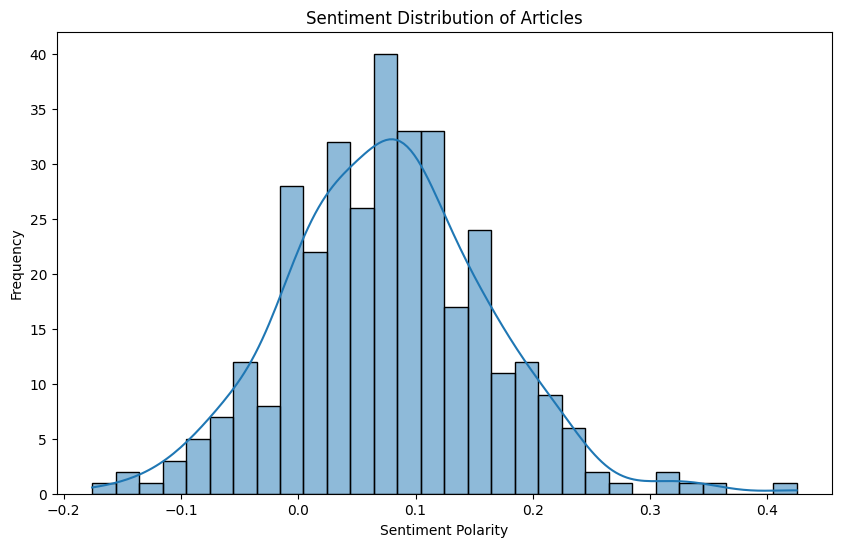

Sentiment analysis complete. Results saved to /Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles_with_sentiment_1.csv


In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles.csv'  # Update to the correct CSV file path
articles_df = pd.read_csv(file_path)

# Perform sentiment analysis using TextBlob
articles_df['sentiment'] = articles_df['clean_body'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Classify sentiment as 'positive', 'neutral', or 'bad'
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'bad'

articles_df['sentiment_category'] = articles_df['sentiment'].apply(classify_sentiment)

# Save the dataframe with sentiment analysis
output_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_articles_with_sentiment_1.csv'  # Update to the desired output path
articles_df.to_csv(output_path, index=False)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(articles_df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

print(f'Sentiment analysis complete. Results saved to {output_path}')


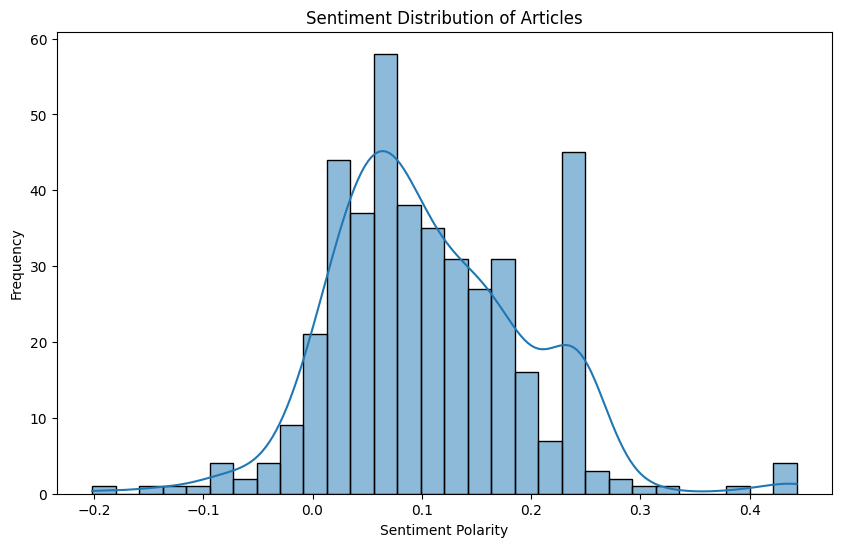

Sentiment analysis complete. Results saved to /Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/articles_with_sentiment.json


In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the JSON file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/article_cache.json'
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract relevant data into a DataFrame
articles = []
for url, details in data.items():
    articles.append({
        'source': details['source'],
        'url': details['url'],
        'date': details['date'],
        'time': details['time'],
        'title': details['title'],
        'body': details['body']
    })

articles_df = pd.DataFrame(articles)

# Perform sentiment analysis using TextBlob
articles_df['sentiment'] = articles_df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as 'positive', 'neutral', or 'bad'
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'bad'

articles_df['sentiment_category'] = articles_df['sentiment'].apply(classify_sentiment)

# Save the dataframe with sentiment analysis to a JSON file
output_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/articles_with_sentiment.json'
articles_df.to_json(output_path, orient='records', lines=True)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(articles_df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

print(f'Sentiment analysis complete. Results saved to {output_path}')
